# Boston Dataset

Exploring the Boston Housing Dataset and predict the housing prices from the given data. 

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
boston=pd.read_csv('boston_house_prices.csv')

In [18]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


NOTE: MEDV is our prices column/ the column to be predicted

In [25]:
boston['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

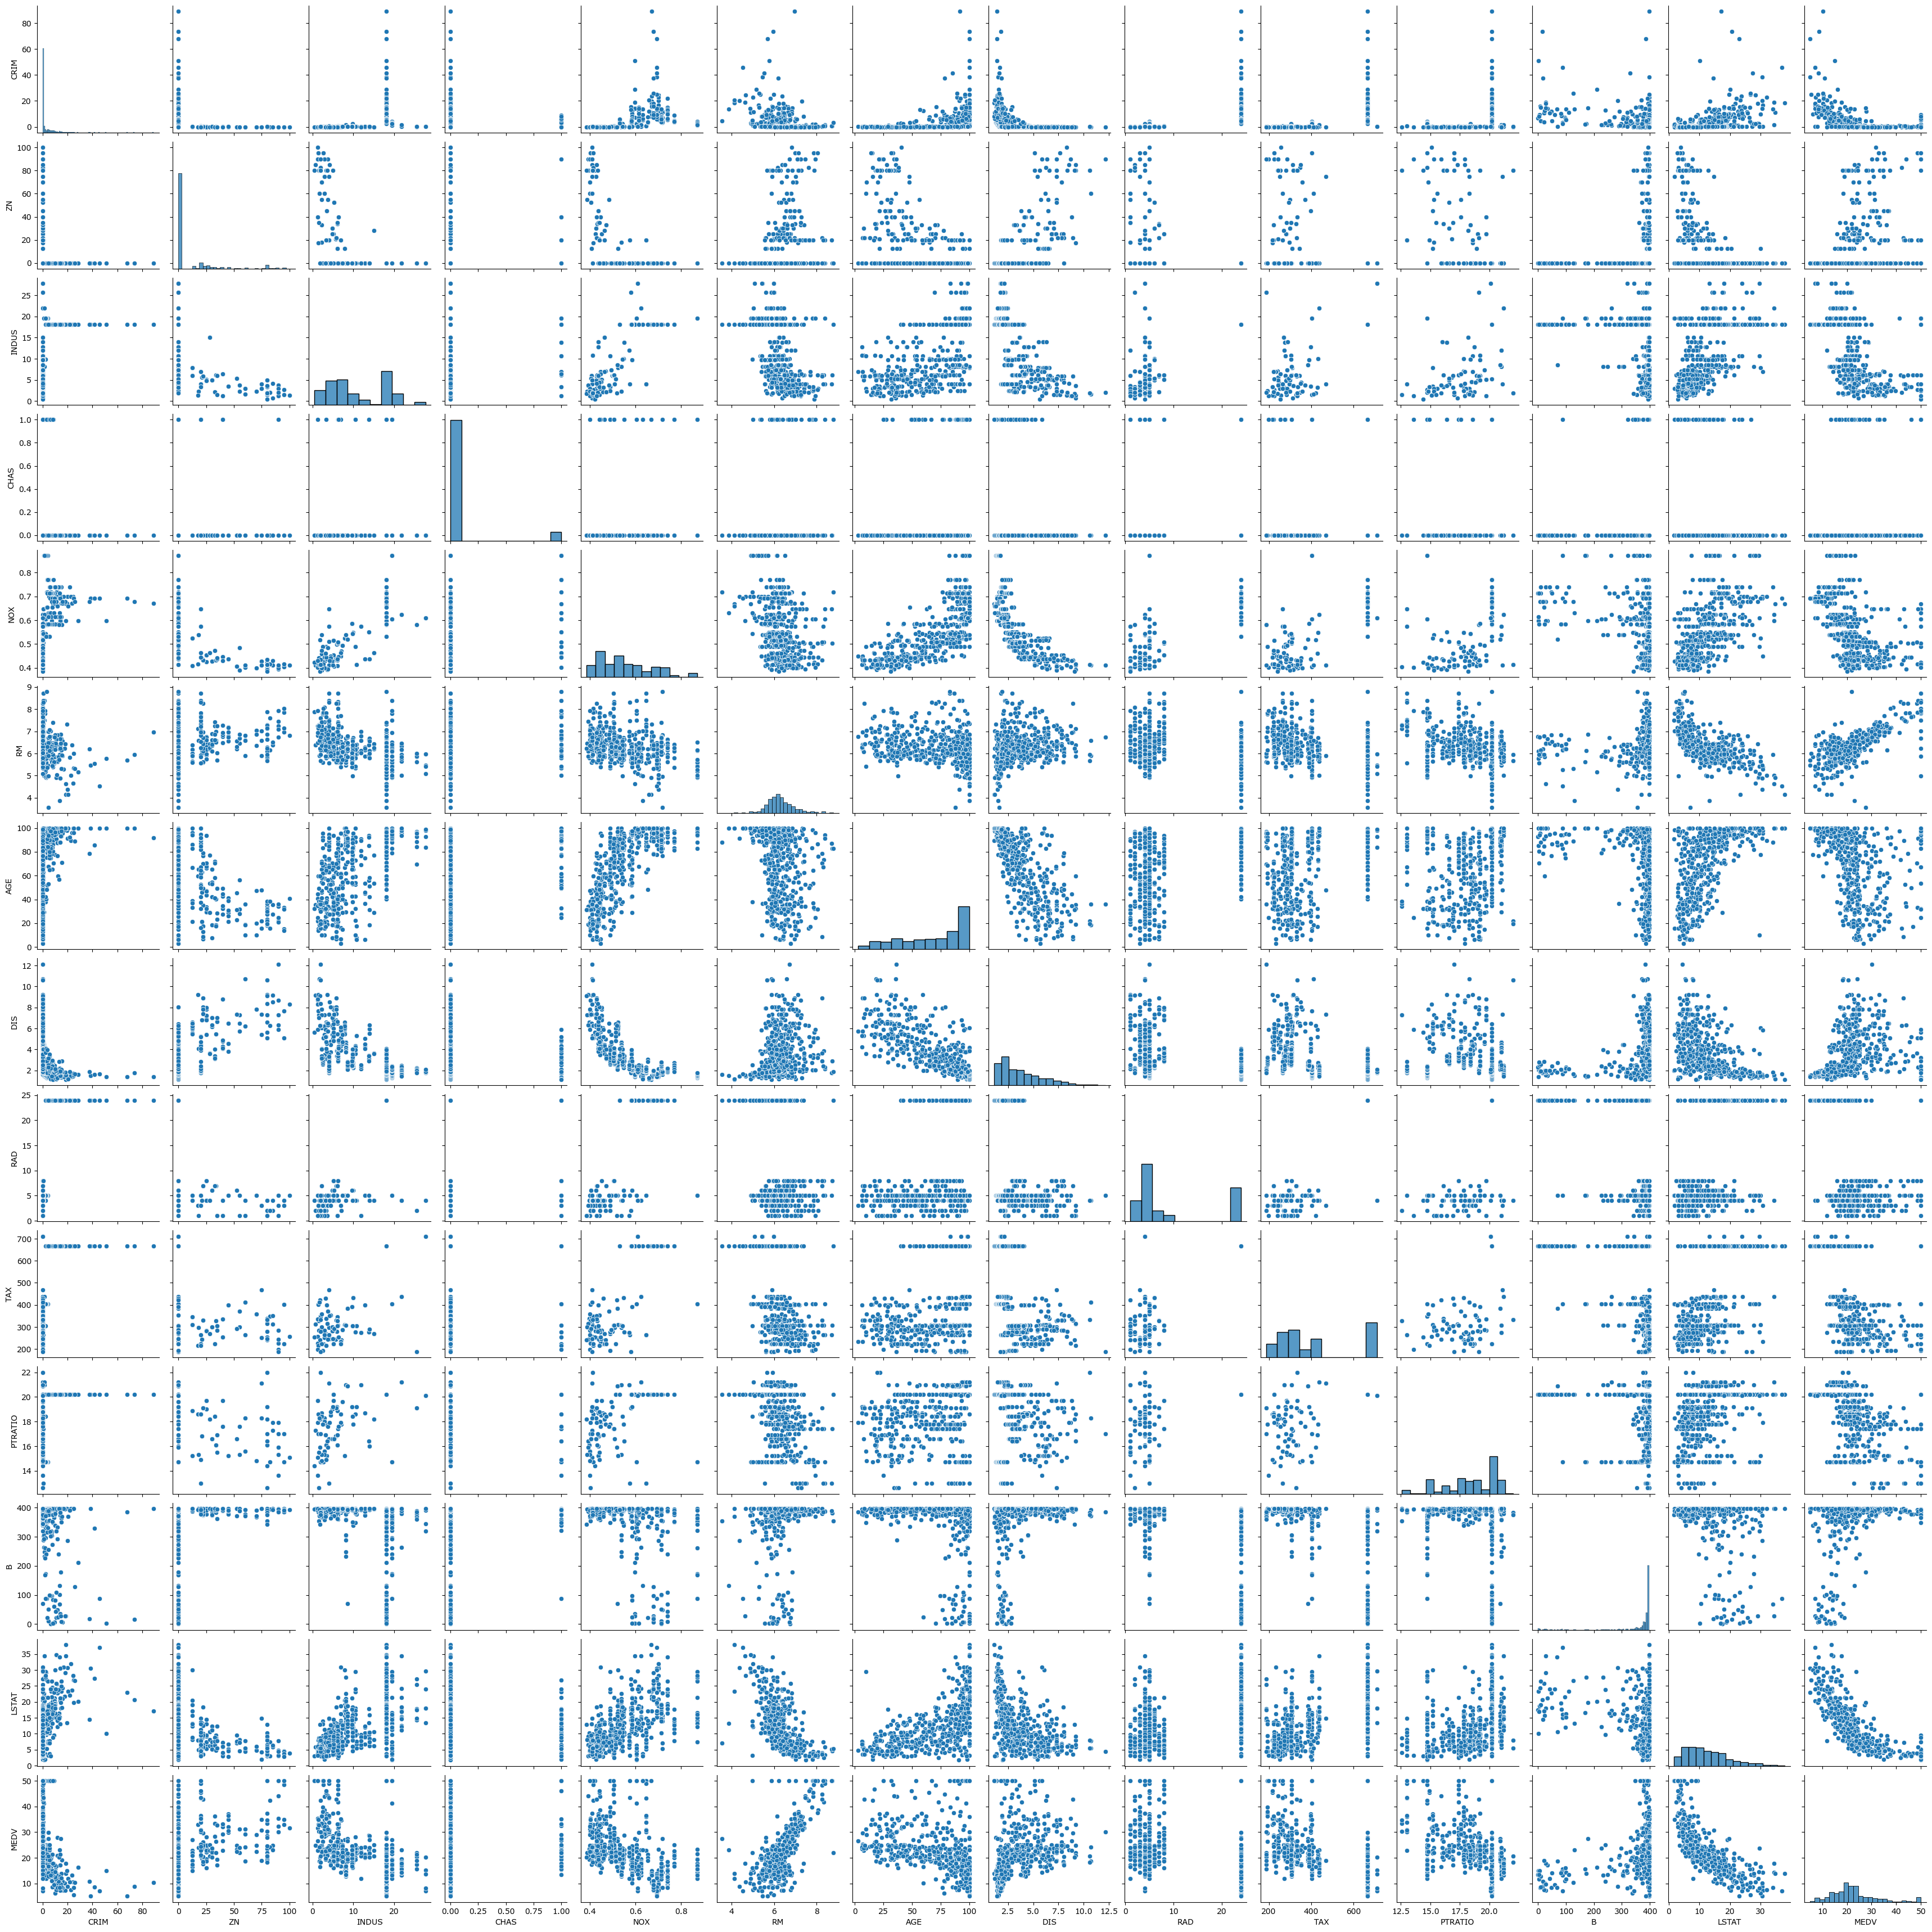

In [59]:
sns.pairplot(boston)

In [26]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [28]:
X=boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [29]:
y=boston['MEDV']

Splitting data into training and testing data

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [32]:
model=LinearRegression()

Training the model

In [33]:
model.fit(X_train,y_train)

LinearRegression()

In [34]:
model.coef_

array([-1.16589102e-01,  5.85833470e-02,  5.84090990e-02,  2.51822086e+00,
       -2.01364485e+01,  2.55110755e+00,  9.58930434e-03, -1.61534374e+00,
        3.72754373e-01, -1.53065326e-02, -1.08825008e+00,  7.33142802e-03,
       -6.04902730e-01])

# Coefficients Table 

In [58]:
cdf=pd.DataFrame(model.coef_,index=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT'],columns=['Coef'])
cdf

,Coef
CRIM,-0.116589
ZN,0.058583
INDUS,0.058409
CHAS,2.518221
NOX,-20.136448
RM,2.551108
AGE,0.009589
DIS,-1.615344
RAD,0.372754
TAX,-0.015307


From the CDF table we find out that RM that is the number of room plays a major role in price of the house

In [42]:
prediction=model.predict(X_test)

Comparing the test sets results with the given results 

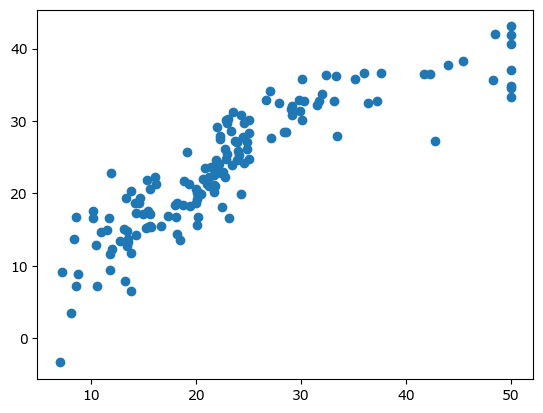

In [46]:
plt.scatter(x=y_test,y=prediction)

# Residual Histogram

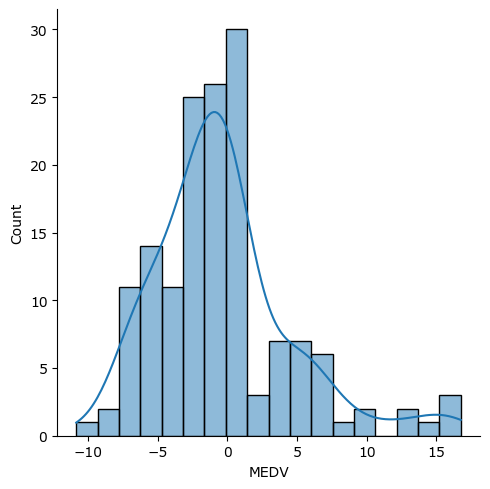

In [50]:
sns.displot(y_test-prediction,kde=True)

# Error Calculation

In [52]:
from sklearn import metrics


Mean Absolute Error

In [54]:
metrics.mean_absolute_error(y_test,prediction)

3.553606391900138

Mean Squared Error

In [55]:
metrics.mean_squared_error(y_test,prediction)

24.2291089851601

Root Mean Squared Error

In [56]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

4.92230728268361